In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split   
from sklearn import datasets, linear_model
import seaborn as sns

In [63]:
data=pd.read_csv("assignment3-data-1.csv")
data

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520
...,...,...,...,...,...
29364,GLY,374,B,-147.749557,155.223562
29365,GLN,375,B,-117.428541,133.019506
29366,ILE,376,B,-113.586448,112.091970
29367,ASN,377,B,-100.668779,-12.102821


In [4]:
data.drop(['residue name','position','chain'], axis=1, inplace=True) 

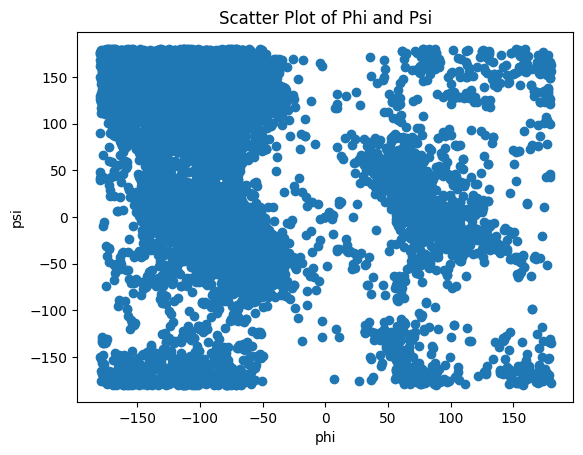

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data['phi'],data['psi']) 
ax.set_title('Scatter Plot of Phi and Psi')  
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()


In [22]:
data

,phi,psi
0,-149.312855,142.657714
1,-44.283210,136.002076
2,-119.972621,-168.705263
3,-135.317212,137.143523
4,-104.851467,95.928520
...,...,...
29364,-147.749557,155.223562
29365,-117.428541,133.019506
29366,-113.586448,112.091970
29367,-100.668779,-12.102821


In [17]:
corr = data.corr()
corr

,phi,psi
phi,1.000000,-0.331294
psi,-0.331294,1.000000


Text(0.5, 1.0, 'Heatmap of Phi And Psi')

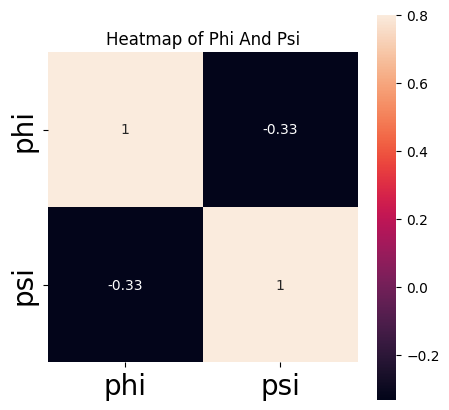

In [22]:
ax = plt.subplots(figsize=(5, 5))#调整画布大小
ax = sns.heatmap(corr, vmax=.8, square=True, annot=True)#画热力图   annot=True 表示显示系数
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Heatmap of Phi And Psi')

In [23]:
data

,phi,psi
0,-149.312855,142.657714
1,-44.283210,136.002076
2,-119.972621,-168.705263
3,-135.317212,137.143523
4,-104.851467,95.928520
...,...,...
29364,-147.749557,155.223562
29365,-117.428541,133.019506
29366,-113.586448,112.091970
29367,-100.668779,-12.102821


In [25]:
data['psi']=(data['psi']+180) % 180
data

,phi,psi
0,30.687145,142.657714
1,135.716790,136.002076
2,60.027379,11.294737
3,44.682788,137.143523
4,75.148533,95.928520
...,...,...
29364,32.250443,155.223562
29365,62.571459,133.019506
29366,66.413552,112.091970
29367,79.331221,167.897179


[[ 92.39767571 108.53190852]
 [ 96.51749868  18.40987087]
 [ 50.82777439  30.15997331]
 [ 93.81336634 158.12293376]
 [ 55.61940578 123.52521055]
 [ 37.20488418 155.27097986]
 [120.79318747 138.54070981]]
[5 6 2 ... 4 3 4]


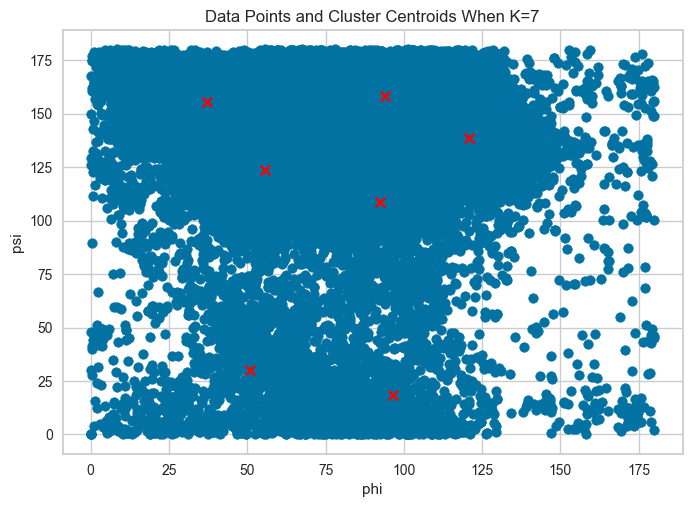

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.scatter(data['phi'],data['psi'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Data Points and Cluster Centroids When K=2')
plt.show()

In [27]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(data, kmeans.labels_))

0.35905856506717004


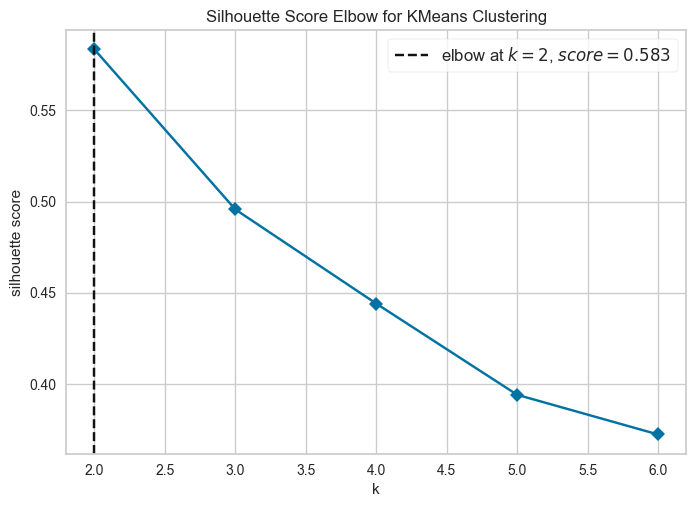

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [30]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,7), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(data)    
visualizer.poof()  

In [ ]:
# +180, mod 180

In [64]:
data.rename(columns={'residue name':'residue'},inplace=True)
data_pro=data.query(' residue=="PRO" ')
data_pro

,residue,position,chain,phi,psi
1,PRO,11,A,-44.283210,136.002076
17,PRO,27,A,-49.944645,-25.888991
68,PRO,79,A,-76.452014,97.745207
110,PRO,121,A,-53.054020,-27.254912
123,PRO,134,A,-66.751364,94.099782
...,...,...,...,...,...
29284,PRO,288,B,-54.565923,-42.141418
29339,PRO,349,B,-66.803083,136.260650
29340,PRO,350,B,-59.612140,160.048387
29347,PRO,357,B,-48.679835,135.208297


In [48]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics